In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from mlapp_models.normal_bivariate_sampler import NormalBivariateGibbs
from mlapp_models.utils import contour_plot

# Gibbs Sampling a Gaussian

Exercise 24.1

In [3]:
cov = np.array([[1, -0.5],[-0.5, 1]])
mu = np.array([1,1])

In [4]:
model = NormalBivariateGibbs(mu, cov, burn_in=10)

In [5]:
num_samples = 10000
samples = model.sample(num_samples)

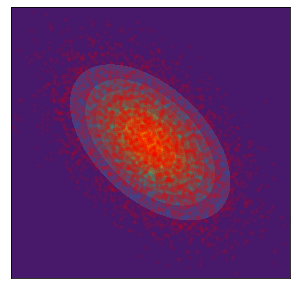

In [6]:
plt.figure(figsize=(5,5))

center = 1
range_ = 3.5
plt.ylim(center - range_, center + range_)
plt.xlim(center - range_, center + range_)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

plt.plot(*samples.T, "r.", alpha=0.07)

# Contour plot of the actual density
contour_plot(
    [partial(stats.multivariate_normal.pdf, mean=mu, cov=cov)],
    plt.contourf,
    x_center=center,
    x_range=range_,
    y_center=center,
    y_range=range_,
);
plt.savefig("../tex/img/gibbs/scatter.png", dpi=400)

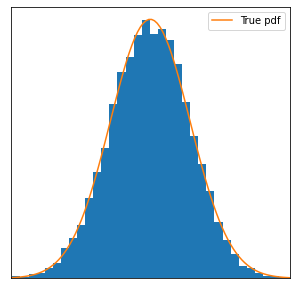

In [7]:
plt.figure(figsize=(5,5))
plt.xlim(center - range_, center + range_)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

_, bins, *_ = plt.hist(samples[:,0], bins=40);
x = np.linspace(center - range_, center + range_, 100)

# Normalize histogram
delta = bins[1] - bins[0]
plt.plot(x, delta * num_samples * stats.norm.pdf(x, 1, 1), label="True pdf")

plt.legend()
plt.savefig("../tex/img/gibbs/x1-hist", dpi=400)

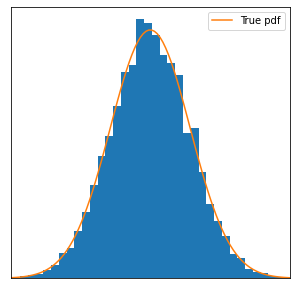

In [8]:
plt.figure(figsize=(5,5))
plt.xlim(center - range_, center + range_)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

# Normalize histogram
_, bins, *_ = plt.hist(samples[:,1], bins=40);
x = np.linspace(center - range_, center + range_, 100)

delta = bins[1] - bins[0]
plt.plot(x, delta * num_samples * stats.norm.pdf(x, 1, 1), label="True pdf")

plt.legend()
plt.savefig("../tex/img/gibbs/x2-hist", dpi=400)